# Lab 3 : Working with Neural Networks

---


Total Points: **90**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs.

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.



In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Indian car selling platform data (say from TrueValue, CarDekho etc) for the regression problem, and for multi-class classification, we will consider Mute language Dataset. For Car Price prediction dataset refer attachted file -'train_set_CarMarketPlace.csv' and 'test_set_CarMarketPlace.csv'. For Mute disability Sign refer zip file attachted.


---



Section 1:  **(Total points = 40)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the car prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) **Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section**

1. Perform an exploratory analysis on the given dataset (train+test taken together). 
  1. Print the attribute names, values and label names and values.
  2. Explore dataset by finding minimum, maximum, mean and standard deviation for each attribute. 
  3. Plot a histogram indicating the distribution of different attributes in the dataset. \\
{Expected output is ten histograms, each corresponding to a different attribute. The X-axis is the domain of the attribute, and Y-axis is the frequency of the attribute corresponding to a domain}  **(3 point)**
2. Perform data pre-processing operations like standardization and normalization.  Plot the histrograms again and note the change in histograms due to standarization. Also,  load train, test set into pandas dataframe.**(2 points)**

3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh (RELU & Linear is also allowed) activations at each layer of MLP for the user.  **( 10 points)**

4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(10 points)**

5. Train your model using the Mean Squared Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**

6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. You can try your custom values as well. **(5 points)**

7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Print the testing error. Comment on your overall observations. **(3+2 = 5 points)**

In [70]:
#Declaration Block
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import cv2
import warnings
warnings.filterwarnings('ignore')


In [125]:
# Loading the data
train_data = pd.read_csv("Sazid Ali - train_set_CarMarketPlace.csv")
test_data = pd.read_csv("Sazid Ali - test_set_CarMarketPlace.csv")

In [126]:
train_data.head()

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
0,Lexus,2019.0,20000.0,Petrol,Automatic,First,22.37,2487.0,214.56,5.0,5150000.0
1,Maruti,2013.0,80000.0,CNG,Manual,Second,32.52,998.0,58.33,5.0,270000.0
2,Tata,2017.0,70000.0,Diesel,Manual,First,19.09,1405.0,69.01,5.0,450000.0
3,Ford,2016.0,70000.0,Diesel,Manual,Second,25.83,1498.0,99.00,5.0,350000.0
4,Maruti,2016.0,81000.0,Diesel,Manual,Second,28.09,1248.0,88.50,5.0,650000.0


In [127]:
test_data.head()

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
0,Volkswagen,2014.0,84000.0,Diesel,Manual,Second,20.14,1498.0,88.50,5.0,300000.0
1,Renault,2018.0,18000.0,Diesel,Manual,First,19.60,1461.0,108.45,5.0,1050000.0
2,Maruti,2017.0,37000.0,Diesel,Automatic,First,26.80,1248.0,74.00,5.0,625000.0
3,Toyota,2014.0,120000.0,Diesel,Manual,First,12.99,2494.0,100.60,7.0,750000.0
4,Maruti,2016.0,45000.0,Petrol,Manual,First,21.40,1197.0,83.10,5.0,575000.0


## 1.Perform an exploratory analysis on the given dataset (train+test taken together).

In [128]:
train_test_data = pd.concat([train_data, test_data])

In [129]:
train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 1581
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           7901 non-null   object 
 1   Model             7901 non-null   float64
 2   Odometer reading  7901 non-null   float64
 3   fuel              7901 non-null   object 
 4   transmission      7901 non-null   object 
 5   owner             7901 non-null   object 
 6   mileage           7901 non-null   float64
 7   engine            7901 non-null   float64
 8   max_power         7901 non-null   float64
 9   seats             7901 non-null   float64
 10  Price             7901 non-null   float64
dtypes: float64(7), object(4)
memory usage: 741.2+ KB


In [130]:
# Number of null values in dataset
train_test_data.isnull().sum()

Company             5
Model               5
Odometer reading    5
fuel                5
transmission        5
owner               5
mileage             5
engine              5
max_power           5
seats               5
Price               5
dtype: int64

In [131]:
# converting categorical attributes to numerical attributes
cat_columns = ['Company', 'fuel', 'transmission', 'owner']

for cat_col in cat_columns:
    train_data[cat_col] = pd.Categorical(train_data[cat_col]).codes
    test_data[cat_col] = pd.Categorical(test_data[cat_col]).codes    

In [132]:
cols = train_data.columns

for c in cols:
    train_data[c] = train_data[c].fillna(np.mean(train_data[c]))
    test_data[c] = test_data[c].fillna(np.mean(test_data[c]))
    
train_data.isnull().sum()   

Company             0
Model               0
Odometer reading    0
fuel                0
transmission        0
owner               0
mileage             0
engine              0
max_power           0
seats               0
Price               0
dtype: int64

## 2.Print the attribute names, values and label names and values.

In [133]:
# 2. Print the attribute names, values and label names and values.
print(train_data.columns)

Index(['Company', 'Model', 'Odometer reading', 'fuel', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats', 'Price'],
      dtype='object')


## 3.Explore dataset by finding minimum, maximum, mean and standard deviation for each attribute.


In [134]:
# 3. Explore dataset by finding minimum, maximum, mean and standard deviation for each attribute.

cols = train_data.columns

info_data = pd.DataFrame(index = ['Minimum', 'Maximum', 'Mean', 'Standard deviation'], columns = cols)

for c in cols:
    mini = np.min(train_data[c])
    maxi = np.max(train_data[c])
    m = np.mean(train_data[c])
    std = np.std(train_data[c])
    
    info_data.at['Minimum', c] = mini
    info_data.at['Maximum', c] = maxi
    info_data.at['Mean', c] = m
    info_data.at['Standard deviation', c] = std
    
info_data    

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
Minimum,-1,1994.0,1.0,-1,-1,-1,0.0,624.0,32.8,2.0,29999.0
Maximum,30,2020.0,2360457.0,3,1,3,42.0,3604.0,400.0,14.0,10000000.0
Mean,17.734029,2013.976582,68141.053006,1.900063,0.867489,0.719323,19.387541,1453.268038,91.413369,5.406013,645718.246203
Standard deviation,7.061721,3.879644,55589.268893,1.006528,0.340906,1.04597,4.048139,502.345368,35.82218,0.954547,802540.500323


## 4. Plot a histogram indicating the distribution of different attributes in the dataset. \ {Expected output is ten histograms, each corresponding to a different attribute. The X-axis is the domain of the attribute, and Y-axis is the frequency of the attribute corresponding to a domain}

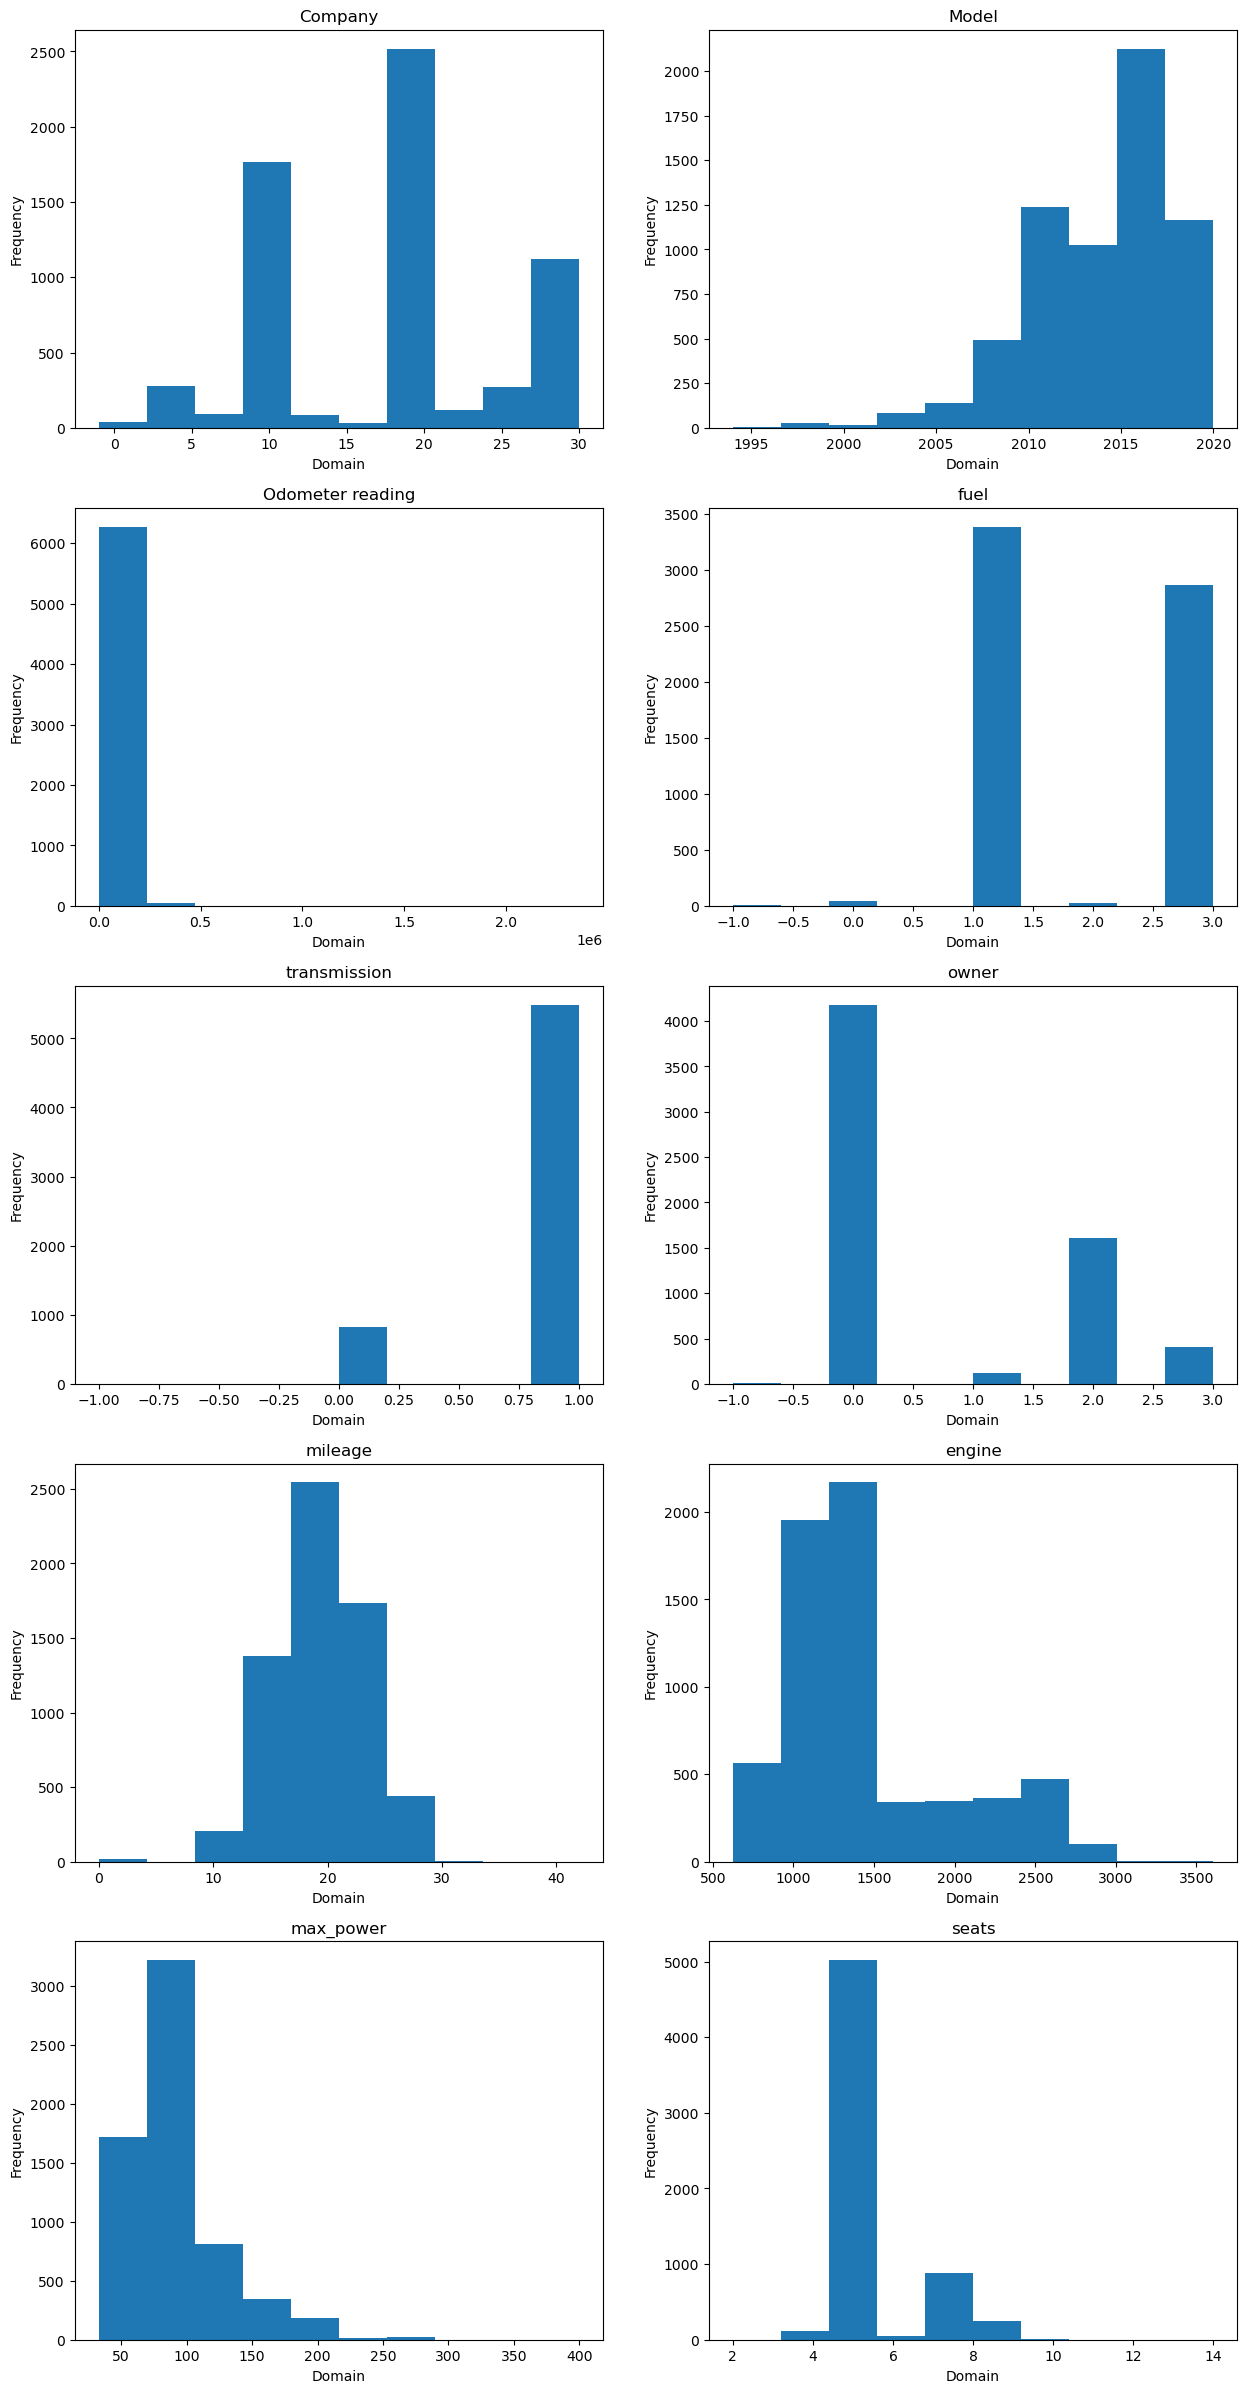

In [135]:
# Plot a histogram indicating the distribution of different attributes in the dataset. 
#{Expected output is ten histograms, each corresponding to a different attribute. The X-axis is the domain of the attribute, and Y-axis is the frequency of the attribute corresponding to a domain}

plt.figure(figsize = [15,30])

cols = train_data.columns

i = 1

flag = False

for c in cols:
    if c == 'Price':
        continue
        
    plt.subplot(5,2,i, title = f"{c}")    
    i = i + 1
    plt.hist(train_data[c])
    plt.xlabel('Domain')
    plt.ylabel('Frequency')
    
# Show plot
plt.show()

## 5. Perform data pre-processing operations like standardization and normalization. Plot the histrograms again and note the change in histograms due to standarization. Also, load train, test set into pandas dataframe

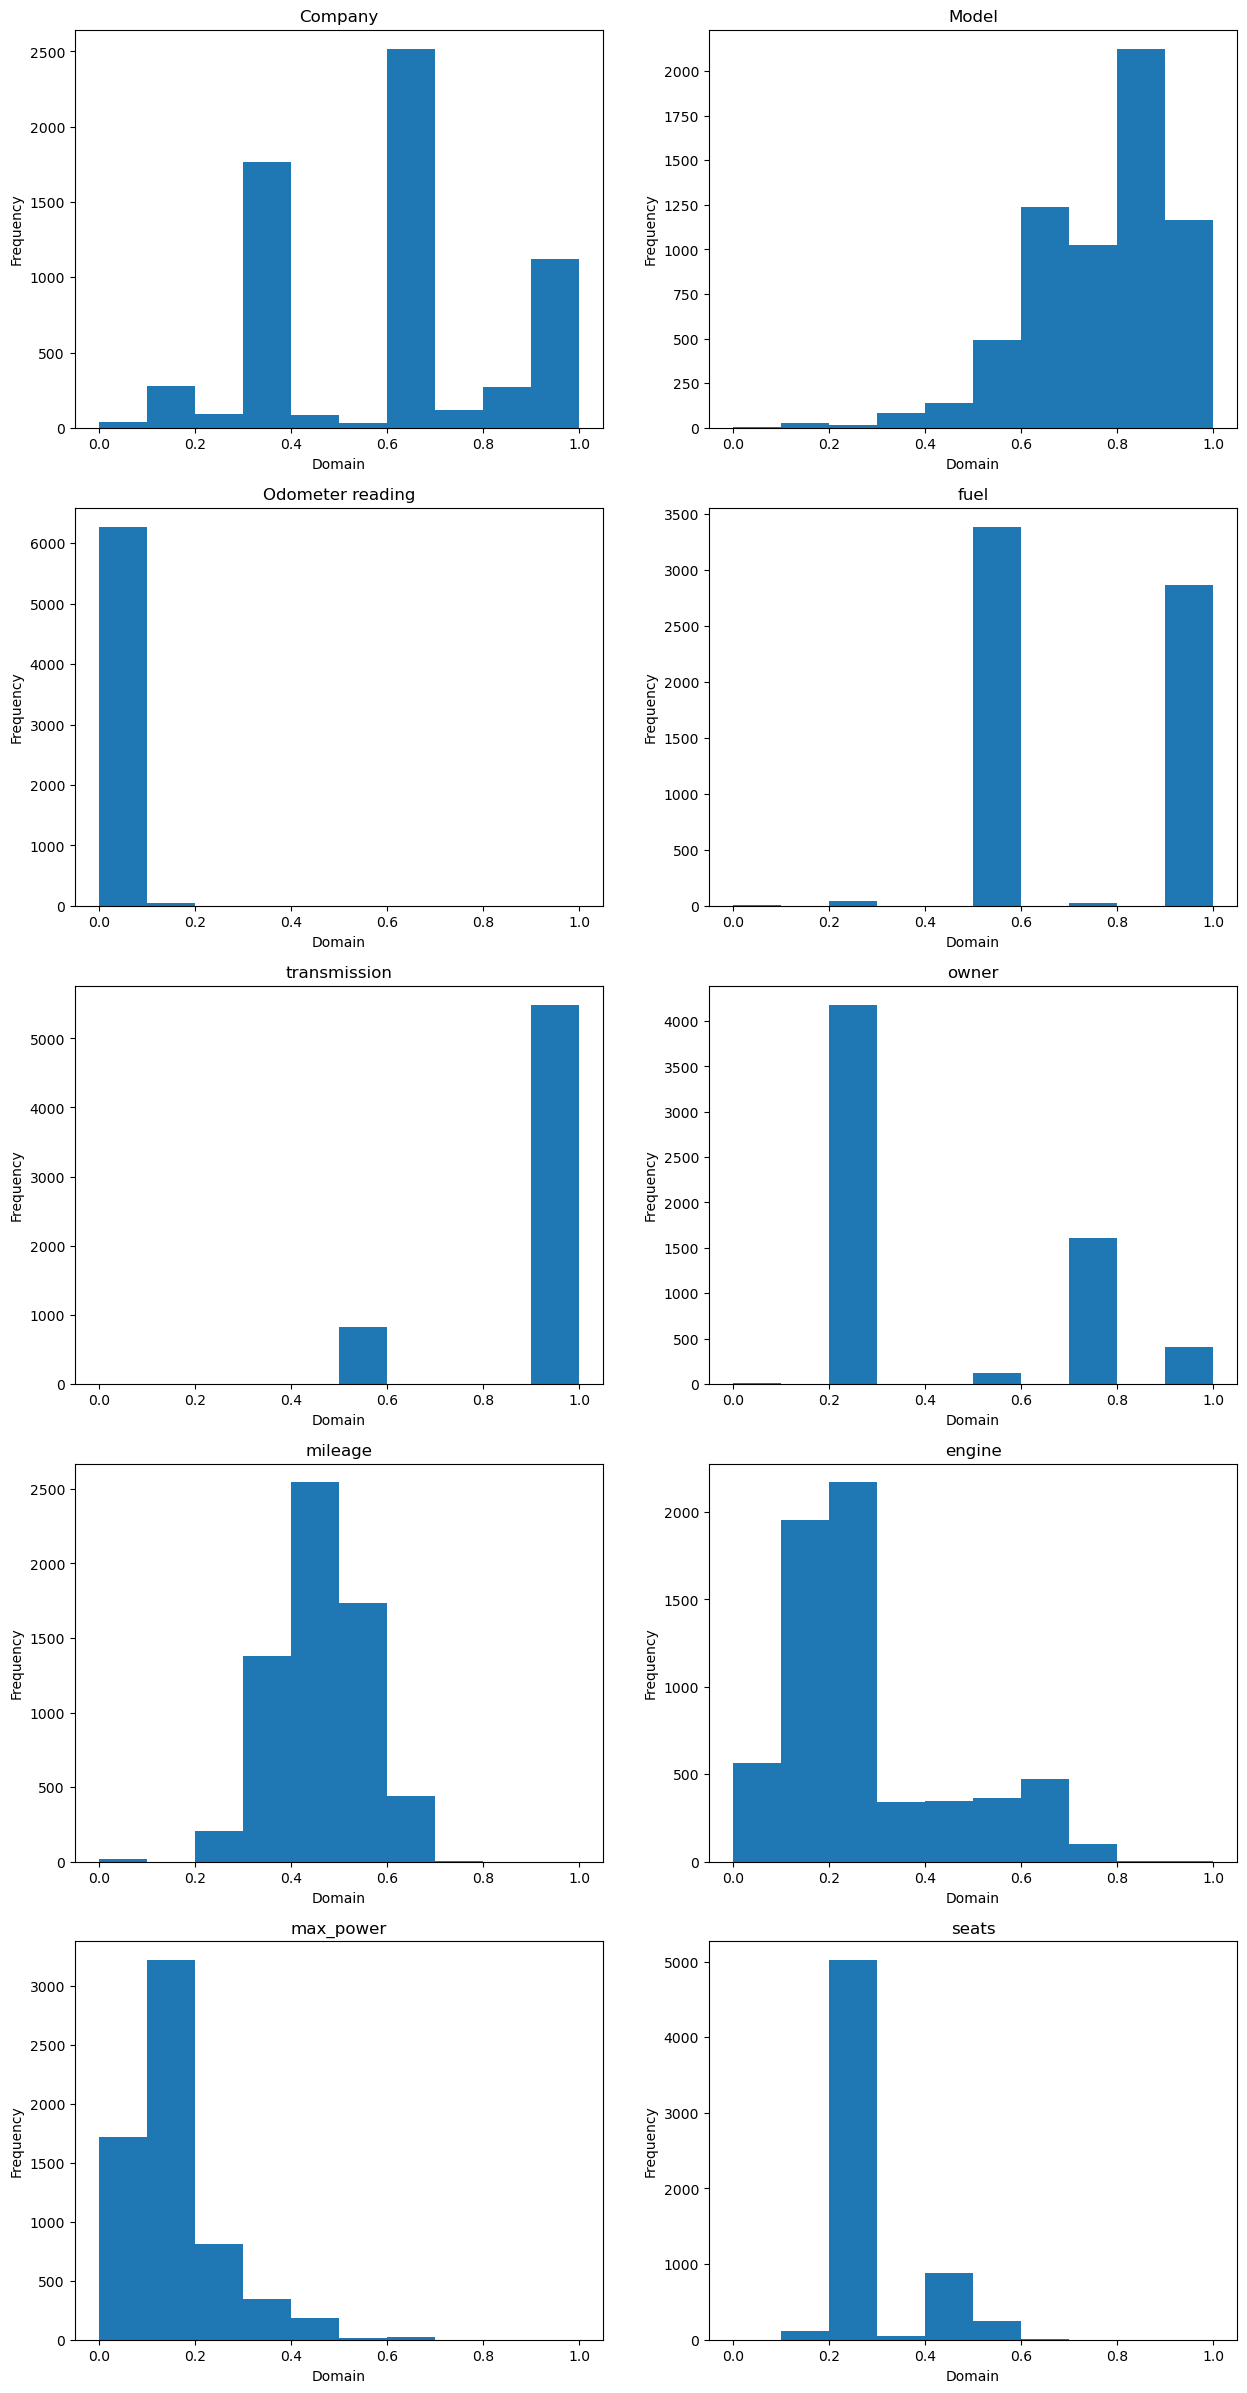

In [136]:
norm_train_data = train_data
norm_test_data = test_data

cols = norm_train_data.columns

for c in cols:
    norm_train_data[c] = (train_data[c] - np.min(train_data[c])) / (np.max(train_data[c]) - np.min(train_data[c]))
    norm_test_data[c] = (test_data[c] - np.min(test_data[c])) / (np.max(test_data[c]) - np.min(test_data[c]))
    
plt.figure(figsize = [15,30])

i = 1

flag = False

for c in cols:
    if c == 'Price':
        continue
        
    plt.subplot(5,2,i, title = f"{c}")    
    i = i + 1
    plt.hist(norm_train_data[c])
    plt.xlabel('Domain')
    plt.ylabel('Frequency')
    
# Show plot
plt.show()    

In [137]:
norm_train_data.head()

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
0,0.580645,0.961538,0.008473,1.00,0.5,0.25,0.532619,0.625168,0.494989,0.25,0.513541
1,0.677419,0.730769,0.033891,0.25,1.0,0.75,0.774286,0.125503,0.069526,0.25,0.024072
2,0.903226,0.884615,0.029655,0.50,1.0,0.25,0.454524,0.262081,0.098611,0.25,0.042126
3,0.322581,0.846154,0.029655,0.50,1.0,0.75,0.615000,0.293289,0.180283,0.25,0.032096
4,0.677419,0.846154,0.034315,0.50,1.0,0.75,0.668810,0.209396,0.151688,0.25,0.062187


In [138]:
norm_test_data.head()

,Company,Model,Odometer reading,fuel,transmission,owner,mileage,engine,max_power,seats,Price
0,0.964286,0.727273,0.055370,0.5,1.0,0.75,0.661195,0.293289,0.220911,0.166667,0.044426
1,0.821429,0.909091,0.011341,0.5,1.0,0.25,0.643467,0.280872,0.302075,0.166667,0.170159
2,0.678571,0.863636,0.024016,0.5,0.5,0.25,0.879842,0.209396,0.161920,0.166667,0.098910
3,0.928571,0.727273,0.079386,0.5,1.0,0.25,0.426461,0.627517,0.270138,0.500000,0.119866
4,0.678571,0.818182,0.029353,1.0,1.0,0.25,0.702561,0.192282,0.198942,0.166667,0.090528


In [85]:
X = norm_train_data.drop("Price", axis = 1)
Y = norm_train_data["Price"]

x_train = np.array(X)
y_train = Y

## 6. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh (RELU & Linear is also allowed) activations at each layer of MLP for the user.

In [86]:
input1, output1 = 10,15
input2, output2 = 15,1
w1 = np.random.randn(output1, input1)
w2 = np.random.randn(output2, input2)
b1 = np.random.randn(output1,1)
b2 = np.random.randn(output2,1)

#### Activation function and it's derivative

In [87]:
def relu(x):
    rows = x.shape[0]            
    if x.ndim  == 1:
        cols = 1
        x = x.reshape((-1,1))
    else:
        cols = x.shape[1]

    out = np.ones((rows,cols))            
    for i in range(rows):
        for j in range(cols):
            out[i,j] = max(0, x[i,j])
    return out

def relu_prime(x):
    rows = x.shape[0]      
    if x.ndim  == 1:
        cols = 1
        x = x.reshape((-1,1))
    else:
        cols = x.shape[1]

    out = np.ones((rows,cols))
    for i in range(rows):
        for j in range(cols):
            out[i,j] = 1 if x[i,j] > 0 else 0
    return out   

def leaky_relu(x, alpha=0.01):
    return np.where(x>0, x, alpha*x)

def leaky_relu_prime(x, alpha=0.01):
    return np.where(x>0, 1, alpha)

#### Error finction and it's derivative

In [88]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred - y_true) / np.size(y_true)

#### Forward and Backward Layer for Stochastic gradient Descent

In [89]:
def forward_dense_layer(x, w, b):
    x = x.reshape((-1,1))
    return np.dot(w,x) + b

def forward_activation(x):
    return relu(x)

def backward_dense_layer(out_grad, x,l_r,w, b):
    w_grad = np.dot(out_grad, x.T)
    in_grad = np.dot(w_grad.T, out_grad)
    w -= l_r * w_grad
    b -= l_r * out_grad
    return w,b,in_grad

def backward_activation(out_grad, x):
    act_prime = relu_prime(x)
    return np.multiply(out_grad, act_prime)

def forward_propagation(x,w1,w2, b1,b2):
    out1 = forward_dense_layer(x, w1,b1)
    out2 = forward_activation(out1)
    out3 = forward_dense_layer(out2, w2,b2)
    out4 = forward_activation(out3)
    return [out1,out2,out3,out4]

### Train your model using the Mean Squared Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods.

#### Stochastic gradient descent

In [91]:
epochs = 100
n = len(x_train)

num_epochs = []
errors = []

for e in range(epochs):
    error = 0
    for i in range(n):
        out = forward_propagation(x_train[i,:], w1,w2, b1,b2)
        error += mse(y_train[i], out[3])
        gradient = mse_prime(y_train[i], out[3])
        # Relu backward propagation
        out_grad = backward_activation(gradient,out[2])
        # Dense layer 2 backward propagation
        w2,b2, out_grad = backward_dense_layer(out_grad, out[1], 0.001,w2, b2)
        # Relu backward propagation
        out_grad = backward_activation(out_grad, out[0])
        # Dense layer
        w1,b1,out_grad = backward_dense_layer(out_grad, x_train[i,:].reshape((-1,1)),0.001, w1, b1)
        
    error /= len(x_train)
    num_epochs.append(e+1)
    errors.append(error)       

### Plot the graph of traning error versus Epochs for both the training methods

Text(0, 0.5, 'Training error')

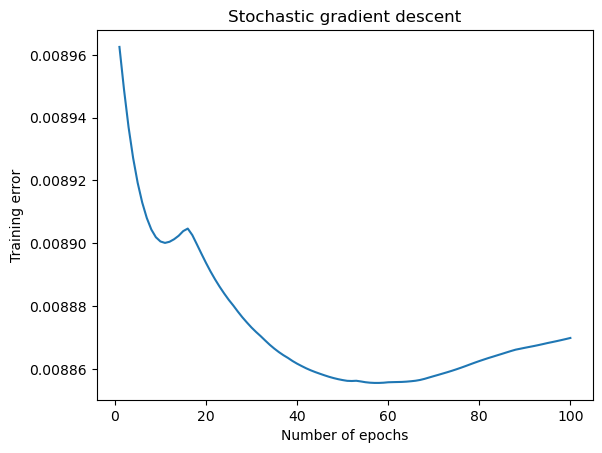

In [92]:
#  Plot the graph of traning error versus Epochs for both the training methods.
plt.title("Stochastic gradient descent")
plt.plot(num_epochs, errors)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")

### Report the final accuracy you achieved on the Test Data using both the traning methods.

It is regression model. So Accuracy is not measure here. Hence Avg mean squared loss is shown

In [114]:
# Plots
x_test = norm_test_data.drop("Price", axis = 1)
y_test = norm_test_data["Price"]

x_test = np.array(x_test)

n = len(x_test)

y_pred = np.ones(n)

test_error = 0.0

for i in range(n):
    out = forward_propagation(x_test[i,:], w1,w2,b1,b2)
    y_pred[i] = out[3]
    test_error += (y_test[i] - y_pred[i]) ** 2
    
    
test_error /= len(x_test)


print(f"Test error using stochastic gradient descent = {test_error}")

Test error using stochastic gradient descent = 0.026227217229932123


#### Batch Gradient Descent

In [115]:
def forward_dense_layer(x, w, b):
    x = x.reshape((-1,1))
    return np.dot(w,x) + b

def forward_activation(x, a_f):
    if a_f == 1:
        return relu(x)
    else:
        return leaky_relu(x)

def backward_dense_layer(out_grad, x,l_r,w, b):
    w_grad = np.dot(out_grad, x.T)
    in_grad = np.dot(w_grad.T, out_grad)
#     w -= l_r * w_grad
#     b -= l_r * out_grad
    return w,in_grad

def backward_activation(out_grad, x, a_f):
    if a_f == 1:
        act_prime = relu_prime(x)
    else:
        act_prime = leaky_relu_prime(x)
        
    return np.multiply(out_grad, act_prime)

def forward_propagation(x,w1,w2, b1,b2,a_f):
    out1 = forward_dense_layer(x, w1,b1)
    out2 = forward_activation(out1, a_f)
    out3 = forward_dense_layer(out2, w2,b2)
    out4 = forward_activation(out3, a_f)
    return [out1,out2,out3,out4]

In [120]:
def batch_gradient_descent(epochs, a_f, l_r):
    
    w1 = np.random.randn(output1, input1)
    w2 = np.random.randn(output2, input2)
    b1 = np.random.randn(output1,1)
    b2 = np.random.randn(output2,1)
    
    n = len(x_train)

    batch_size = 32
    num_batches = n // batch_size

    num_epochs = []
    errors = []

    for e in range(epochs):
        error = 0
        for b in range(num_batches):        
            d_w1 = 0
            d_w2 = 0
            d_b1 = 0
            d_b2 = 0

            start_idx = b*batch_size
            end_idx = min(start_idx + batch_size, n)
            for i in range(start_idx, end_idx,1):
                out = forward_propagation(x_train[i,:], w1,w2,b1,b2,a_f)
                error += mse(Y[i], out[3])
                gradient = mse_prime(Y[i], out[3])
                out_grad = backward_activation(gradient,out[2], a_f)
                d_b2 += out_grad
                delta_w2,out_grad = backward_dense_layer(out_grad, out[1], 0.001,w2,b2)
                out_grad = backward_activation(out_grad, out[0], a_f)
                d_b1 += out_grad
                delta_w1,out_grad = backward_dense_layer(out_grad, x_train[i,:].reshape((-1,1)), 0.001, w1,b1)
                d_w1 += delta_w1
                d_w2 += delta_w2
            d_w1 /= epochs
            d_w2 /= epochs
            d_b1 /= epochs
            d_b2 /= epochs

            w1 -= l_r*d_w1
            w2 -= l_r*d_w2
            b1 -= l_r*d_b1
            b2 -= l_r*d_b2

        error /= n
        errors.append(error)  
        
    return errors, w1,w2,b1,b2

In [121]:
# (activation function) a_f = 1 => Relu function, a_f = 2 => Leaky Relu function
# batch_gradient_descent function takes two arguments, first one is number of epochs and other is type of activation function

errors,w1,w2,b1,b2 = batch_gradient_descent(100, 1, 0.001)

Text(0, 0.5, 'Training error')

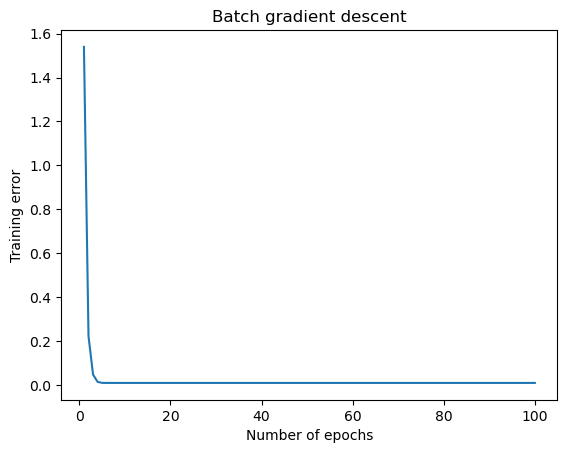

In [122]:
#  Plot the graph of traning error versus Epochs for both the training methods.
plt.title("Batch gradient descent")
plt.plot(num_epochs, errors)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")

In [139]:
# Plots
x_test = norm_test_data.drop("Price", axis = 1)
y_test = norm_test_data["Price"]

x_test = np.array(x_test)

n = len(x_test)

y_pred = y_test

test_error = 0.0

for i in range(n):
    out = forward_propagation(x_test[i,:], w1,w2,b1,b2,1)
    y_pred[i] = out[3]
    test_error += (y_test[i] - y_pred[i]) ** 2
    
test_error /= len(x_test)


print(f"Test error using stochastic gradient descent = {test_error}")

Test error using stochastic gradient descent = 0.0


## Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. You can try your custom values as well. (5 points)

I used mini-batch gradient descent with batch size of 32

## Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Print the testing error. Comment on your overall observations. (3+2 = 5 points)

Observation : Mini-batch gradient descent is bettern than stochastic gradient descent

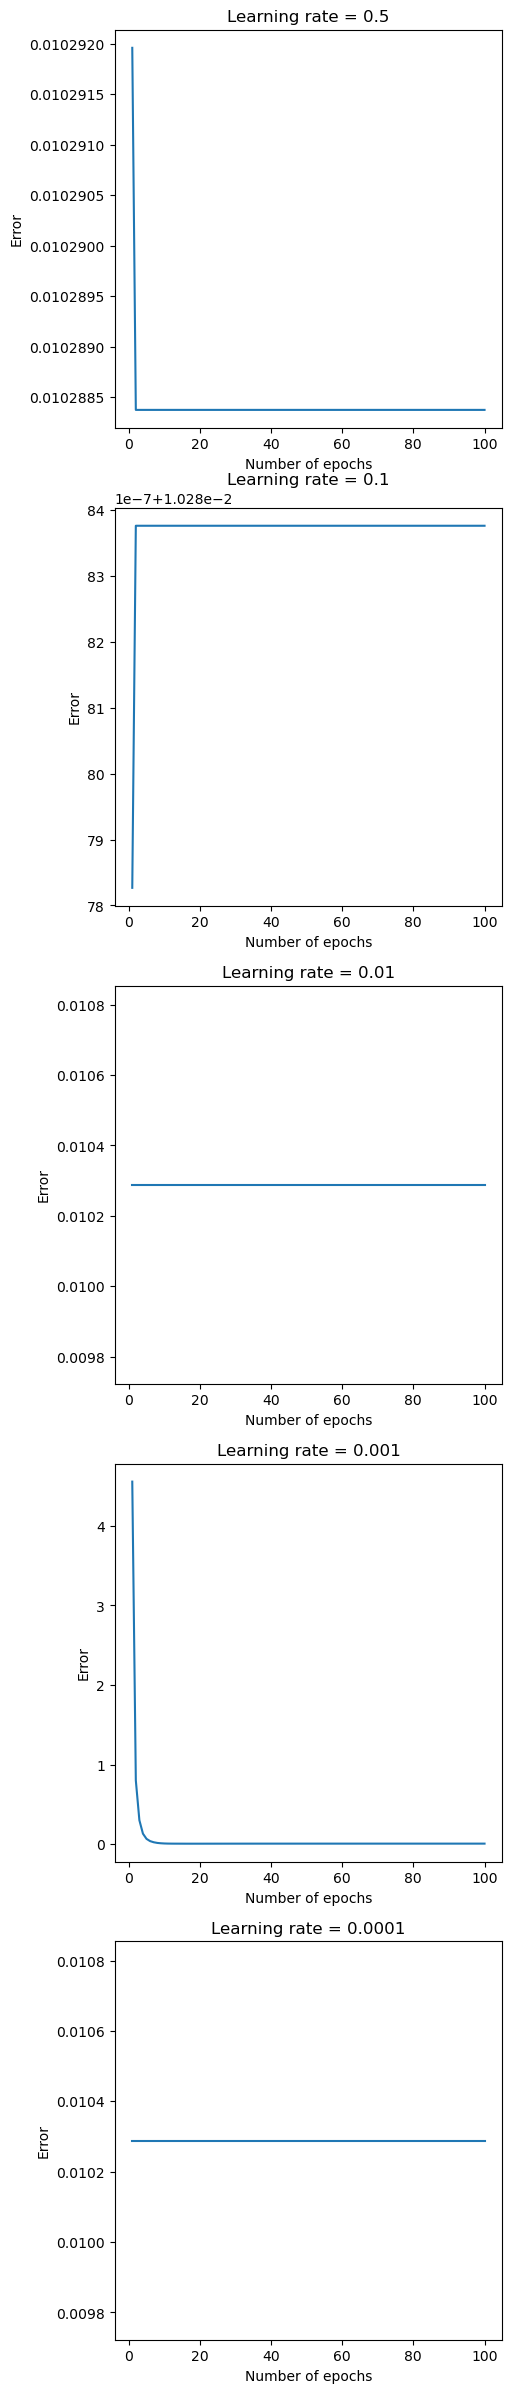

In [145]:
learning_rates = [0.5,0.1,0.01,0.001,0.0001]

num_epochs = np.arange(1,101)
mini_errors = []

i = 1

plt.figure(figsize = [5,30])

for l_r in learning_rates:
    errors,w1,w2,b1,b2 = batch_gradient_descent(100, 1, l_r)
    mini_errors.append(np.min(errors))
    
    plt.subplot(5,1,i)
    i = i+1
    plt.plot(num_epochs, errors)
    plt.title(f"Learning rate = {l_r}")
    plt.xlabel("Number of epochs")
    plt.ylabel("Error")

plt.show()       

Text(0, 0.5, 'Training error')

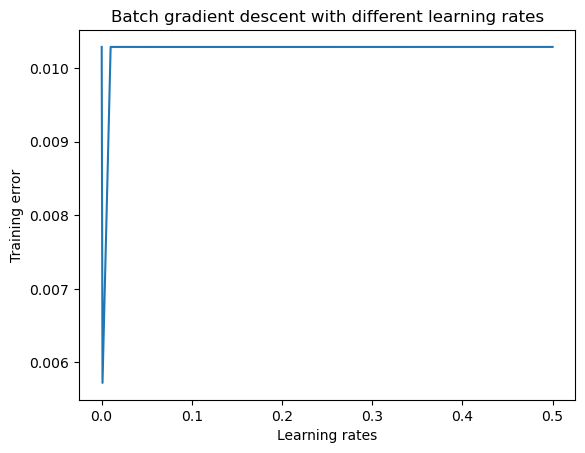

In [146]:
plt.title("Batch gradient descent with different learning rates")
plt.plot(learning_rates, mini_errors)
plt.xlabel("Learning rates")
plt.ylabel("Training error")


---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Mute signs using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each class. **(2 points)**

2. Plot the distribution of number of images in each class. Is the distribution uniform? Comment. **(2+1 points)**

3. Process the dataset through the [Canny Edge detection](https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e) and display the feature map for one example from each class. **(5 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(7 points)**
*  Input layer
*  Con2D with 32 neurons 3x3 kernals and ReLU activation. 
*  Con2D with 32 neurons 3x3 kernals and ReLU activation with batch normalization. 
*  Max Pooling layer with pool-size 2x2 and padding as 'valid'. 
*  Con2D with 32 neurons 3x3 kernals and relu activation and strides 2.
*  Con2D with 24 neurons 3x3 kernals and ReLU activation. 
*  Batch normalization
*  Max Pooling layer with size 2x2 and 'valid' as padding
*  Con2D with 24 neurons 3x3 kernals and ReLU activation and stride 2. 
*  Con2D with 16 neurons 3x3 kernals and ReLU activation and followed by Batch normalization.
*  Max Pooling layer with size 2x2 and 'valid' as padding.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Dropout of 30% ie. 0.3 
*  Global Average pooling 2D layer
*  Fully Connected Dense Layer with number of classes neurons and softmax activation.

3. Implement using cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. Bonus points for custom implementation of cross entropy loss function. **(5 points + 5 bonus points)**

4. Compile and train your model with four different optimizers viz. SGD,
RMSprop, Adam,\& Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**. Add early stopping with (min_delta=0.01, patience=2) while compiling and training your model. **(3points)**.

   NOTE: You can try to find best learning rate from following: [0.001, 0.0001, 0.00001, 0.01] and take batch size to be 32 in data generators.

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and loss function wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**



In [2]:
# import Sign dataset
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
from PIL import Image

tf.random.set_seed(42)
np.random.seed(42)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')

## 1. Explore the Dataset. Display one randomly selected image from each class. (2 points)

In [4]:
images = []
labels = []

# Define the directory where your data is stored
data_dir = 'Sazid Ali - MuteSigns/indianNumber/dataN'

# Get the list of classes by getting the names of all subdirectories in the data directory
classes = sorted(os.listdir(data_dir))

# Loop through each class and add the image filenames to the data list
for class_name in classes:
    # Get a list of all the image filenames for this class
    for i in os.listdir(os.path.join(data_dir, class_name)):
        filename = 'Sazid Ali - MuteSigns/indianNumber/dataN/' + class_name + '/' + i
        images.append(Image.open(filename))
        labels.append(int(class_name))
images = pd.Series(list(images), name = 'images')
label = pd.Series(list(labels), name = 'labels')

df = pd.concat([images, label], axis = 1)

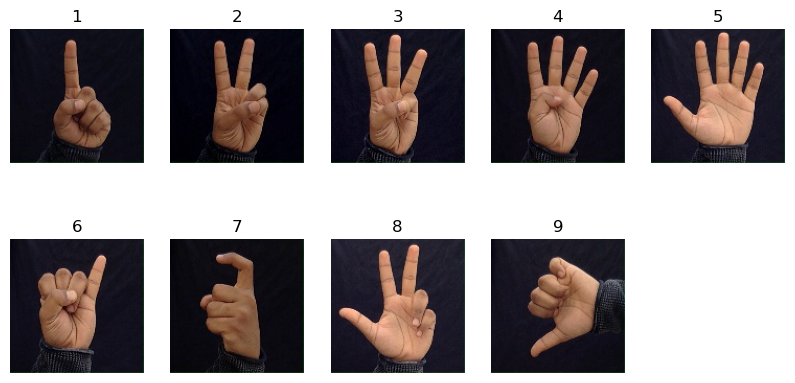

In [5]:
# Explore the Dataset. Display one randomly selected image from each class

random_images = df.groupby('labels').apply(lambda x: x.sample(1))

plt.figure(figsize = [10,5])

i = 1

for index,row in random_images.iterrows():
    plt.subplot(2,5,i)
    i = i+1
    plt.imshow(row['images'])
    plt.title(row['labels'])
    plt.axis('off')
plt.show()   

## 2. Plot the distribution of number of images in each class. Is the distribution uniform? Comment.

#### Yes, number of images in each class are same

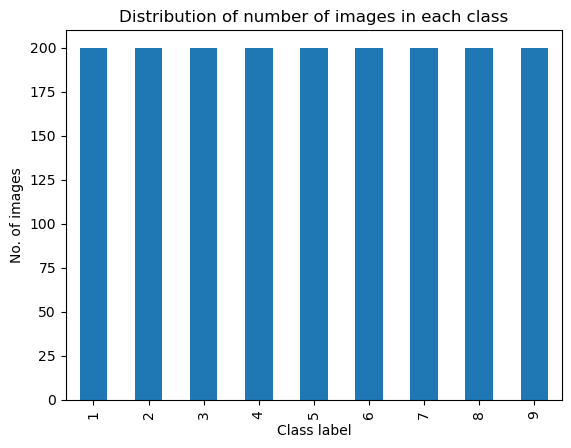

In [6]:
# Plot the distribution of number of images in each class. Is the distribution uniform? Comment.
counts = df['labels'].value_counts()

counts.plot(kind='bar')
plt.title('Distribution of number of images in each class')
plt.xlabel('Class label')
plt.ylabel('No. of images')
plt.show()

## 3. Process the dataset through the Canny Edge detection and display the feature map for one example from each class. (5 points)

In [7]:
# Process the dataset through the Canny Edge detection and display the feature map for one example from each class.
canny_images = []
canny_labels = []
test_canny_images = []
test_canny_labels = []
valid_canny_images = []
valid_canny_labels = []


# Define the directory where your data is stored
data_dir = 'Sazid Ali - MuteSigns/indianNumber/dataN'
valid_dir_path = 'valid_data_MuteSigns/valid_data/'
test_dir_path = 'test_data_MuteSigns/test_data/'

train_out_dir = 'canny_train'
valid_out_dir = 'canny_valid'
test_out_dir = 'canny_test'

if not os.path.exists(train_out_dir):
    os.makedirs(train_out_dir)
    
if not os.path.exists(valid_out_dir):
    os.makedirs(valid_out_dir) 
    
if not os.path.exists(test_out_dir):
    os.makedirs(test_out_dir)    

In [8]:
# Get the list of classes by getting the names of all subdirectories in the data directory
classes = sorted(os.listdir(data_dir))

# Loop through each class and add the image filenames to the data list
for class_name in classes:
    # Get a list of all the image filenames for this class
    class_dir = 'canny_train/' + class_name
    if not os.path.exists(class_dir):
        os.makedirs(class_dir) 
    
    for i in os.listdir(os.path.join(data_dir, class_name)):
        filename1 = 'Sazid Ali - MuteSigns/indianNumber/dataN/' + class_name + '/' + i
                
        img = cv2.imread(filename1, cv2.IMREAD_GRAYSCALE)
        edge_map = cv2.Canny(img, 100, 200)
               
        cv2.imwrite(os.path.join(train_out_dir,class_name,i), edge_map)
        edge_map_img = Image.fromarray(edge_map)
        canny_images.append(edge_map_img)
        canny_labels.append(int(class_name))

In [9]:
# Process the dataset through the Canny Edge detection and display the feature map for one example from each class.   
        
classes = sorted(os.listdir(test_dir_path))

for class_name in classes:
    class_dir = 'canny_test/' + class_name
    if not os.path.exists(class_dir):
        os.makedirs(class_dir) 
    
    # Get a list of all the image filenames for this class
    for i in os.listdir(os.path.join(test_dir_path, class_name)):
        filename2 = 'test_data_MuteSigns/test_data/' + class_name + '/' + i
            
        img = cv2.imread(filename2, cv2.IMREAD_GRAYSCALE)
        edge_map = cv2.Canny(img, 100, 200)
        cv2.imwrite(os.path.join(test_out_dir,class_name,i), edge_map)
        edge_map_img = Image.fromarray(edge_map)
        test_canny_images.append(edge_map_img)
        test_canny_labels.append(int(class_name))

In [10]:
classes = sorted(os.listdir(valid_dir_path))
        
for class_name in classes:
    class_dir = 'canny_valid/' + class_name
    if not os.path.exists(class_dir):
        os.makedirs(class_dir) 
        
    # Get a list of all the image filenames for this class
    for i in os.listdir(os.path.join(valid_dir_path, class_name)):
        filename3 = 'valid_data_MuteSigns/valid_data/' + class_name + '/' + i        
        
        img = cv2.imread(filename3, cv2.IMREAD_GRAYSCALE)
        edge_map = cv2.Canny(img, 100, 200)
        cv2.imwrite(os.path.join(valid_out_dir,class_name,i), edge_map)
        edge_map_img = Image.fromarray(edge_map)
        valid_canny_images.append(edge_map_img)
        valid_canny_labels.append(int(class_name))
                

In [11]:
images = pd.Series(list(canny_images), name = 'images')
label = pd.Series(list(canny_labels), name = 'labels')

train_df = pd.concat([images, label], axis = 1)

images = pd.Series(list(test_canny_images), name = 'images')
label = pd.Series(list(test_canny_labels), name = 'labels')

test_df = pd.concat([images, label], axis = 1)

images = pd.Series(list(valid_canny_images), name = 'images')
label = pd.Series(list(valid_canny_labels), name = 'labels')

valid_df = pd.concat([images, label], axis = 1)

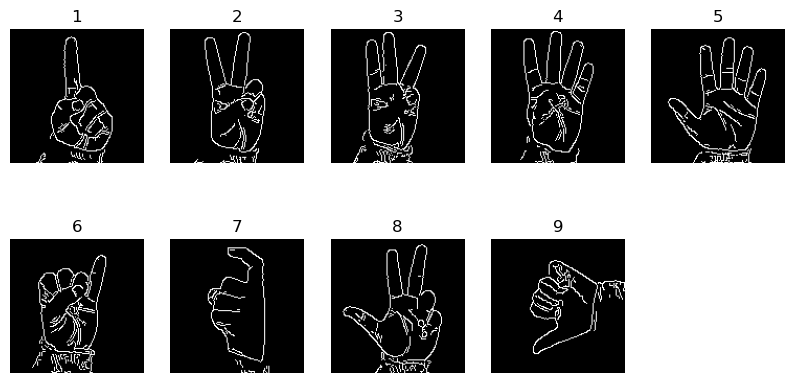

In [13]:
random_images = train_df.groupby('labels').apply(lambda x: x.sample(1))

plt.figure(figsize = [10,5])

i = 1

for index,row in random_images.iterrows():
    plt.subplot(2,5,i)
    i = i+1
    plt.imshow(row['images'], cmap='gray')
    plt.title(row['labels'])
    plt.axis('off')
plt.show()   

## 4. Using the Keras library, implement a CNN model for classification. Use the following network architecture: (7 points)

In [17]:
# Load dataset train_data, test_data, Validation data

train_dir_path = 'canny_train/'
valid_dir_path = 'canny_valid/'
test_dir_path = 'canny_test/'

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_generator_from_dir(directory_path, batch_size_):
      data_gen = ImageDataGenerator(rescale=1./255)
      data_batch_generator = data_gen.flow_from_directory(directory_path, color_mode = 'rgb', 
      batch_size=batch_size_)
  
      return data_batch_generator

In [22]:
train_gen =  get_generator_from_dir(train_dir_path, 128)
valid_gen = get_generator_from_dir(valid_dir_path, 128)
test_gen = get_generator_from_dir(test_dir_path, 128)

Found 1800 images belonging to 9 classes.
Found 900 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, ZeroPadding2D, GlobalAveragePooling2D, BatchNormalization, Dropout 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks  import EarlyStopping


IMG_WIDTH,IMG_HEIGHT = 128,128

# Input layer
visible = Input(shape=(IMG_WIDTH,IMG_HEIGHT,3),name='input')

# Con2D with 32 neurons 3x3 kernals and ReLU activation.
conv1 = Conv2D(32, kernel_size=3, activation='relu',name='conv1')(visible)

# Con2D with 32 neurons 3x3 kernals and ReLU activation with batch normalization.
conv2 = Conv2D(32, kernel_size=3, activation='relu',name='conv2')(conv1)
batch_norm1 = BatchNormalization()(conv2)

# Max Pooling layer with pool-size 2x2 and padding as 'valid'.
max_pool1 = MaxPooling2D(pool_size=(2, 2), padding="valid",name='max_pool1')(batch_norm1)

# Con2D with 32 neurons 3x3 kernals and relu activation and strides 2.
conv3 = Conv2D(32, kernel_size=3, strides=(2,2), activation='relu',name='conv3')(max_pool1)

# Con2D with 24 neurons 3x3 kernals and ReLU activation.
conv4 = Conv2D(24, kernel_size=3, strides=(2,2), activation='relu',name='conv4')(conv3)

# Batch normalization
batch_norm2 = BatchNormalization()(conv4)

# Max Pooling layer with size 2x2 and 'valid' as padding
max_pool2 = MaxPooling2D(pool_size=(2, 2), padding="valid",name='max_pool2')(batch_norm2)

# Con2D with 24 neurons 3x3 kernals and ReLU activation and stride 2.
conv5 = Conv2D(24, kernel_size=3, strides=(2,2), activation='relu',name='conv5')(max_pool2)

# Con2D with 16 neurons 3x3 kernals and ReLU activation and followed by Batch normalization.
conv6 = Conv2D(16, kernel_size=3, activation='relu',name='conv6')(conv5)
batch_norm3 = BatchNormalization()(conv6)

# Max Pooling layer with size 2x2 and 'valid' as padding.
max_pool3 = MaxPooling2D(pool_size=(1, 1), padding="valid",name='max_pool3')(batch_norm3)

# Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.
hidden1 = Dense(128, activation='relu', kernel_regularizer=l2(0.05))(max_pool3)

# Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.
hidden2 = Dense(128, activation='relu', kernel_regularizer=l2(0.05))(hidden1)

# Dropout of 30% ie. 0.3
dropout = Dropout(0.3)(hidden2)

# Global Average pooling 2D layer
avg_pool = GlobalAveragePooling2D()(dropout)

# Fully Connected Dense Layer with number of classes neurons and softmax activation.
output = Dense(9, activation='softmax')(avg_pool)

model = Model(inputs=visible, outputs=output)


## Implement using cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. Bonus points for custom implementation of cross entropy loss function.

## Compile and train your model with four different optimizers viz. SGD, RMSprop, Adam,& Adagrad. Plot the training loss for all four optimizers. Comment on your observations. (10 points). Add early stopping with (min_delta=0.01, patience=2) while compiling and training your model.

OBSERVATION : Adagrad is giving minimum training loss. Also it is giving validation categorical accuracy above 99%

## 1. Adam optimizer

In [25]:
acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]

## Used cross entropy function
cat_loss = tf.keras.losses.CategoricalCrossentropy()

es = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)
# history1 = model.fit(train_data, shuffle=True, validation_data=valid_data, callbacks=[es])

learning_rates = [0.01,0.001,0.0001,0.00001]
losses1 = []

for l_r in learning_rates:
    opt = tf.keras.optimizers.Adam(learning_rate=l_r)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = acc_metrics)
    history1 = model.fit(train_gen, shuffle=True, validation_data=valid_gen, callbacks=[es], batch_size = 128)
    losses1.append(history1.history['loss'])

15/15 [==============================] - 314s 21s/step - loss: 0.4280 - categorical_accuracy: 0.9019 - val_loss: 0.7247 - val_categorical_accuracy: 0.9022


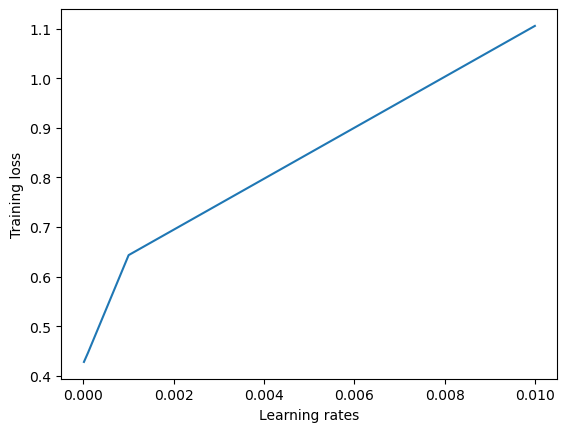

In [26]:
plt.plot(learning_rates, losses1)
plt.xlabel("Learning rates")
plt.ylabel("Training loss")
plt.show()

## 2. SGD optimizer

In [27]:
acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]

## Used cross entropy function
cat_loss = tf.keras.losses.CategoricalCrossentropy()

es = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)

learning_rates = [0.01,0.001,0.0001,0.00001]
losses2 = []

for l_r in learning_rates:
    opt = tf.keras.optimizers.SGD(learning_rate=l_r)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = acc_metrics)
    history2 = model.fit(train_gen, shuffle=True, validation_data=valid_gen, callbacks=[es])
    losses2.append(history2.history['loss'])

15/15 [==============================] - 298s 20s/step - loss: 0.4188 - categorical_accuracy: 0.9985 - val_loss: 0.4442 - val_categorical_accuracy: 0.9989


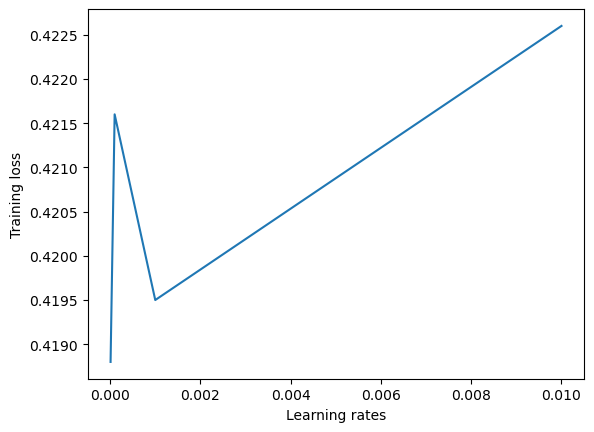

In [29]:
plt.plot(learning_rates, losses2)
plt.xlabel("Learning rates")
plt.ylabel("Training loss")
plt.show()

## 3. RMSProp optimizer

In [30]:
acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]

## Used cross entropy function
cat_loss = tf.keras.losses.CategoricalCrossentropy()

es = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)
# history1 = model.fit(train_data, shuffle=True, validation_data=valid_data, callbacks=[es])

learning_rates = [0.01,0.001,0.0001,0.00001]
losses3 = []

for l_r in learning_rates:
    opt = tf.keras.optimizers.RMSprop(learning_rate=l_r)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = acc_metrics)
    history3 = model.fit(train_gen, shuffle=True, validation_data=valid_gen, callbacks=[es])
    losses3.append(history3.history['loss'])

15/15 [==============================] - 261s 17s/step - loss: 0.4072 - categorical_accuracy: 0.9089 - val_loss: 0.6697 - val_categorical_accuracy: 0.8689


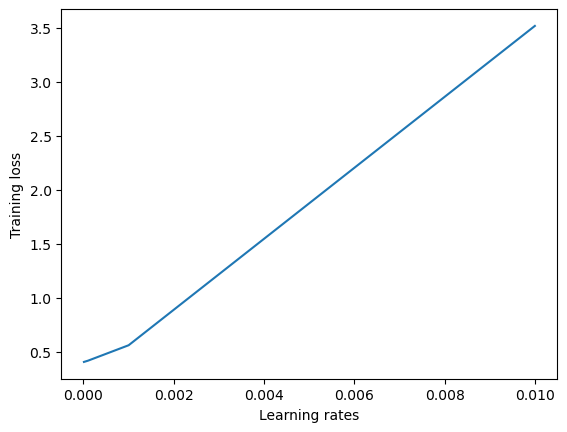

In [31]:
plt.plot(learning_rates, losses3)
plt.xlabel("Learning rates")
plt.ylabel("Training loss")
plt.show()

## 4. Adagrad optimizer

In [32]:
acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]

## Used cross entropy function
cat_loss = tf.keras.losses.CategoricalCrossentropy()

es = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)

learning_rates = [0.01,0.001,0.0001,0.00001]
losses4 = []

for l_r in learning_rates:
    opt = tf.keras.optimizers.Adagrad(learning_rate=l_r)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = acc_metrics)
    history4 = model.fit(train_gen, shuffle=True, validation_data=valid_gen, callbacks=[es])
    losses4.append(history4.history['loss'])

15/15 [==============================] - 272s 18s/step - loss: 0.3947 - categorical_accuracy: 0.9959 - val_loss: 0.4197 - val_categorical_accuracy: 0.9933


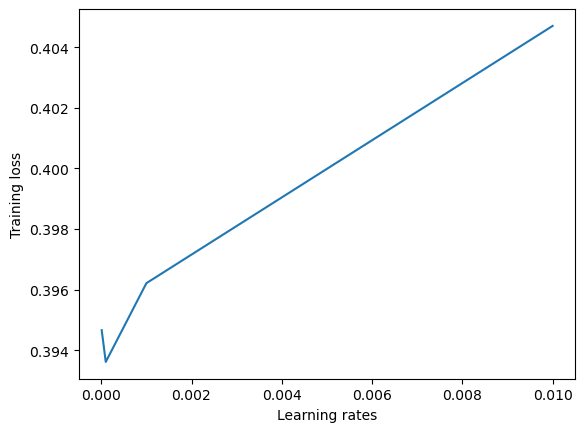

In [33]:
plt.plot(learning_rates, losses4)
plt.xlabel("Learning rates")
plt.ylabel("Training loss")
plt.show()

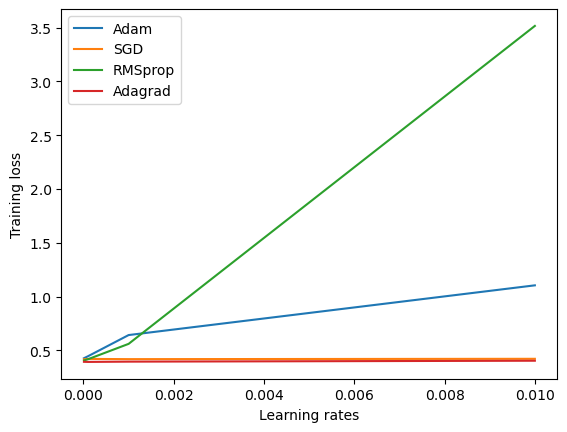

In [35]:
plt.plot(learning_rates, losses1)
plt.plot(learning_rates, losses2)
plt.plot(learning_rates, losses3)
plt.plot(learning_rates, losses4)
plt.xlabel("Learning rates")
plt.ylabel("Training loss")
plt.legend(['Adam','SGD','RMSprop','Adagrad'])
plt.show()

## Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and loss function wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis.

 Added one extra hidden layer which is names as 'hidden3' with LeakyRelu activation function
 
 But accuracy is not improved further. Model archietecture that was given in the assignment was giving maximum accuracy as 100%. 
 Below model is also giving testing accuracy as 99.97%.



In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, ZeroPadding2D, GlobalAveragePooling2D, BatchNormalization, Dropout 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks  import EarlyStopping
from keras.layers import LeakyReLU


IMG_WIDTH,IMG_HEIGHT = 128,128

visible = Input(shape=(IMG_WIDTH,IMG_HEIGHT,3),name='input')

conv1 = Conv2D(32, kernel_size=3, activation='relu',name='conv1')(visible)

conv2 = Conv2D(32, kernel_size=3, activation='relu',name='conv2')(conv1)

batch_norm1 = BatchNormalization()(conv2)

max_pool1 = MaxPooling2D(pool_size=(2, 2), padding="valid",name='max_pool1')(batch_norm1)

conv3 = Conv2D(32, kernel_size=3, strides=(2,2), activation='relu',name='conv3')(max_pool1)

conv4 = Conv2D(24, kernel_size=3, strides=(2,2), activation='relu',name='conv4')(conv3)

batch_norm2 = BatchNormalization()(conv4)

max_pool2 = MaxPooling2D(pool_size=(2, 2), padding="valid",name='max_pool2')(batch_norm2)

conv5 = Conv2D(24, kernel_size=3, strides=(2,2), activation='relu',name='conv5')(max_pool2)

conv6 = Conv2D(16, kernel_size=3, activation='relu',name='conv6')(conv5)

batch_norm3 = BatchNormalization()(conv6)

max_pool3 = MaxPooling2D(pool_size=(1, 1), padding="valid",name='max_pool3')(batch_norm3)

hidden1 = Dense(128, activation='relu', kernel_regularizer=l2(0.05))(max_pool3)

hidden2 = Dense(128, activation='relu', kernel_regularizer=l2(0.05))(hidden1)

# Extra hidden layer
hidden3 = Dense(128, activation = LeakyReLU(alpha=0.05), kernel_regularizer=l2(0.05))(hidden2)

dropout = Dropout(0.3)(hidden2)

avg_pool = GlobalAveragePooling2D()(dropout)

output = Dense(9, activation='softmax')(avg_pool)

model = Model(inputs=visible, outputs=output)


In [41]:
acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]

## Used cross entropy function
cat_loss = tf.keras.losses.CategoricalCrossentropy()

training_losses = []
testing_losses_acc = []
epochs = 10
histories = []


for e in range(epochs):
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = acc_metrics)
    history = model.fit(train_gen, epochs = e+1, shuffle=True, validation_data=valid_gen, callbacks=[es], batch_size=128)
    histories.append(history)
    training_losses.append(history.history['loss'])
    
    # Finding out testing accuracy and testing loss
    test_loss, test_acc = model.evaluate(test_gen)
    testing_losses_acc.append([test_loss, test_acc])
        

4/4 [==============================] - 6s 2s/step - loss: 16.4111 - categorical_accuracy: 0.1111
Epoch 1/2
15/15 [==============================] - 241s 16s/step - loss: 1.1609 - categorical_accuracy: 0.6978 - val_loss: 9.7851 - val_categorical_accuracy: 0.2267
Epoch 2/2
4/4 [==============================] - 6s 1s/step - loss: 13.0793 - categorical_accuracy: 0.2556
Epoch 1/3
15/15 [==============================] - 203s 14s/step - loss: 0.8164 - categorical_accuracy: 0.7956 - val_loss: 11.4771 - val_categorical_accuracy: 0.2300
Epoch 2/3
15/15 [==============================] - 199s 13s/step - loss: 0.7007 - categorical_accuracy: 0.9611 - val_loss: 15.2896 - val_categorical_accuracy: 0.2178
Epoch 3/3
4/4 [==============================] - 5s 1s/step - loss: 11.8071 - categorical_accuracy: 0.2200
Epoch 1/4
15/15 [==============================] - 196s 13s/step - loss: 0.6899 - categorical_accuracy: 0.7889 - val_loss: 12.1673 - val_categorical_accuracy: 0.2244
Epoch 2/4
15/15 [=========

4/4 [==============================] - 6s 2s/step - loss: 9.6313 - categorical_accuracy: 0.2644


In [50]:
testing_losses = []
testing_acc = []
for i in range(len(testing_losses_acc)):
    testing_losses.append(testing_losses_acc[i][0])
    testing_acc.append(testing_losses_acc[i][1])
    
print(testing_losses)
print(testing_acc)

[16.411052703857422, 13.079304695129395, 11.807061195373535, 6.020538330078125, 0.7692803144454956, 0.20211085677146912, 2.4746785163879395, 0.1246001347899437, 4.256129741668701, 9.631329536437988]
[0.1111111119389534, 0.25555557012557983, 0.2199999988079071, 0.15333333611488342, 0.7155555486679077, 0.9822221994400024, 0.5644444227218628, 0.9977777600288391, 0.2133333384990692, 0.2644444406032562]


In [62]:
training_losses = []
training_acc = []

i = 1
for h in histories:
    training_losses.append(h.history['loss'][i-1])
    training_acc.append(h.history['categorical_accuracy'][i-1])
    
print(training_losses)
print(testing_acc)

[1.4331190586090088, 1.160851001739502, 0.8164333701133728, 0.6898816823959351, 0.5791746973991394, 0.4600208103656769, 0.3899913430213928, 0.2710970938205719, 0.36626553535461426, 0.2190392017364502]
[0.1111111119389534, 0.25555557012557983, 0.2199999988079071, 0.15333333611488342, 0.7155555486679077, 0.9822221994400024, 0.5644444227218628, 0.9977777600288391, 0.2133333384990692, 0.2644444406032562]


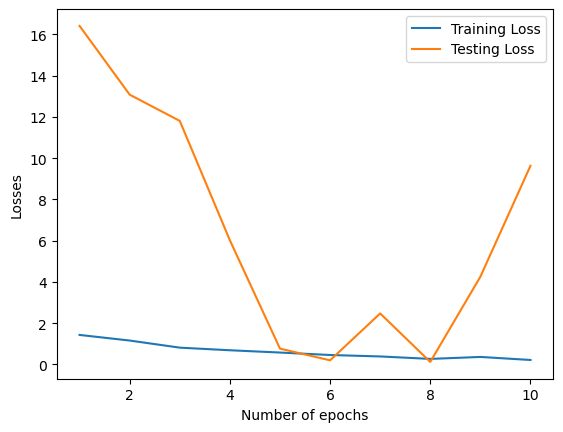

In [67]:
epochs = np.arange(1,11)

plt.plot(epochs, training_losses)
plt.plot(epochs, testing_losses)
plt.xlabel("Number of epochs")
plt.ylabel("Losses")
plt.legend(["Training Loss", "Testing Loss"])
plt.show()

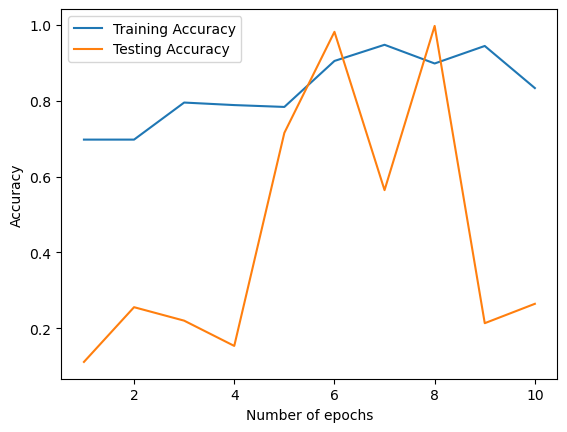

In [69]:
plt.plot(epochs, training_acc)
plt.plot(epochs, testing_acc)
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.show()